In [0]:
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Model, Sequential
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Reshape
from keras import regularizers
import matplotlib.pyplot as plt

In [0]:
(x_train, _), (x_test, _) = mnist.load_data()

# Scales the training and test data to range between 0 and 1.
max_value = float(x_train.max())
x_train = x_train.astype('float32') / max_value
x_test = x_test.astype('float32') / max_value

In [0]:
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [17]:
input_dimension = x_train.shape[1]
autoencoder = Sequential()

autoencoder.add(Dense(256, input_shape=(input_dimension, ), activation='relu'))
autoencoder.add(Dense(input_dimension, activation='sigmoid'))

autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_6 (Dense)              (None, 784)               201488    
Total params: 402,448
Trainable params: 402,448
Non-trainable params: 0
_________________________________________________________________


In [18]:
input_image = Input(shape=(input_dimension,))
encoder_layer = autoencoder.layers[0]
encoder = Model(input_image, encoder_layer(input_image))
encoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               200960    
Total params: 200,960
Trainable params: 200,960
Non-trainable params: 0
_________________________________________________________________


In [19]:
autoencoder.compile(optimizer='rmsprop', loss='binary_crossentropy')
autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 6s 108us/step - loss: 0.1599 - val_loss: 0.1068
Epoch 2/50
60000/60000 [==============================] - 6s 107us/step - loss: 0.0966 - val_loss: 0.0882
Epoch 3/50
60000/60000 [==============================] - 6s 108us/step - loss: 0.0856 - val_loss: 0.0800
Epoch 4/50
60000/60000 [==============================] - 6s 107us/step - loss: 0.0805 - val_loss: 0.0774
Epoch 5/50
60000/60000 [==============================] - 6s 107us/step - loss: 0.0777 - val_loss: 0.0765
Epoch 6/50
60000/60000 [==============================] - 7s 110us/step - loss: 0.0758 - val_loss: 0.0747
Epoch 7/50
60000/60000 [==============================] - 6s 108us/step - loss: 0.0744 - val_loss: 0.0741
Epoch 8/50
60000/60000 [==============================] - 6s 104us/step - loss: 0.0733 - val_loss: 0.0725
Epoch 9/50
60000/60000 [==============================] - 6s 108us/step - loss: 0.0725 - val_loss: 0.0

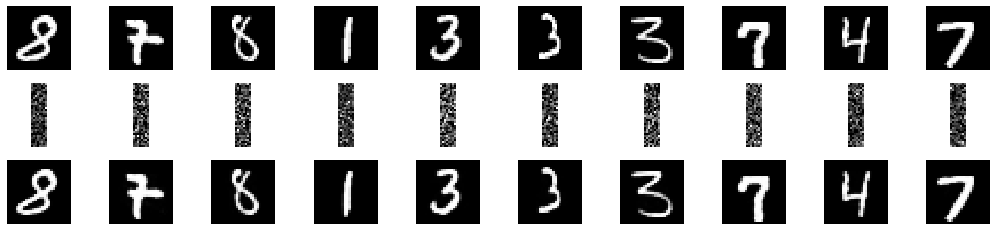

In [21]:
num_images = 10
np.random.seed(194)
random_test_images = np.random.randint(x_test.shape[0], size=num_images)

encoded_imgs = encoder.predict(x_test)
decoded_imgs = autoencoder.predict(x_test)

plt.figure(figsize=(18, 4))

for i, image_idx in enumerate(random_test_images):
    # plot original image
    ax = plt.subplot(3, num_images, i + 1)
    plt.imshow(x_test[image_idx].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # plot encoded image
    ax = plt.subplot(3, num_images, num_images + i + 1)
    plt.imshow(encoded_imgs[image_idx].reshape(32, 8))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # plot reconstructed image
    ax = plt.subplot(3, num_images, 2*num_images + i + 1)
    plt.imshow(decoded_imgs[image_idx].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()